## Data Analysis of Used Car Prices Based on Characteristics with Python

![text](plots.png)

## Table of Contents
1. [Research Questions](#0)<br>
2. [Linear Regression](#1)<br>
3. [ANOVA Hypothesis Testing](#2)<br>
4. [Descriptive Statical Analysis](#3)<br>
5. [Value Counts](#4)<br>
6. [Statistics by Grouping](#5)<br>
7. [Pearson Correlation Coefficient and P-Value](#6) <br>
8. [ANOVA and the Pearson Coefficient Analysis](#7) <br>






## Research Question <a id="0"></a>

* What are the main characteristics (i.e. variables, columns), which have the most impact on the car price(dependent variable)? 
* What is the correlation between the price of the used vehicle and selected characteristics (e.g. body-style, horsepower, mileage) of the car? 

Price is the dependent variable because is the variable of interest, the its values or measurements depend (if we succeed in refuting the null hypothesis), on the values of the independent variables (the characteristics we are analyzing). 

In [40]:
import pandas as pd
import numpy as np
import matplotlib #Provides powerful tools for efficient work with large, multi-dimensional arrays and matrices, along a range of mathematical functions. 
import scipy #Provides wide range of scientific and numerical computing tools. 
import seaborn #data visualization tool build on top of matplotlib.
import pyodide_build
import pyodide_cli

In [41]:
import statsmodels.api as sm #Provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [42]:
#Creating the variable that has the link towards our data
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [43]:
#Reading data stored in CSV file.
df=pd.read_csv("automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Analyzing individual features patterns using visualization

In [44]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [45]:
#List the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [46]:
#What is the data type of the column "peak-rpm"?
df['peak-rpm'].dtypes

dtype('float64')

In [ ]:
#Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## Linear Regression <a id="1"></a>

Continuous numerical variables are variables that may contain any value within some range. They can be of the type "int64" or "float64". A good way to visualize this numerical variables is through a scatterplots with fitted lines. 

'regplot' plots the scatterplot plus the fitted regression line for that data.




### Positive relationship

(0.0, 52809.85647658483)

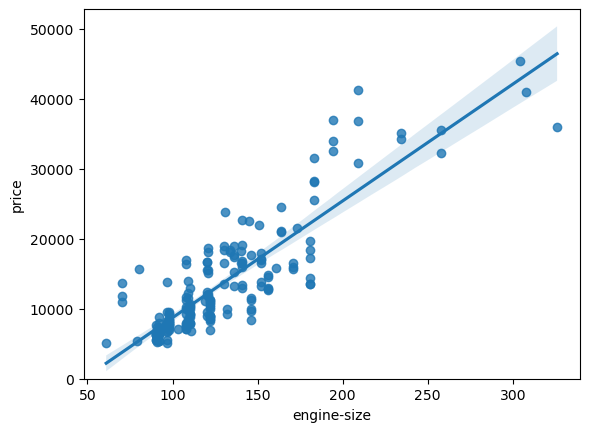

In [ ]:
#Engine size as potential predictor of variable price.
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,) #Setting the y-axis limitation to less than 0 but no limitation to the y-value maximum

In [ ]:
#Developing the mathematical model for the relationship between 'engine-size' and 'price'

#Define the independent variable x ('engine-size') 
x=df['engine-size']

#Add a constant term to the expression
x=sm.add_constant(x)
#Define the dependent variable y ('price').
y=df['price']

#Fit the linear regression model
model=sm.OLS(y,x).fit() #Fits the Ordinary Least Squares model to the data.

#Get the coefficients of the model
m=model.params['engine-size'] #Retrieve the slope of the regression line
b=model.params['const'] #Retrieve the y-intercept of the regression line

#Round 'm' to the second decimal place
m=round(m,2)
#Round 'b' to the second decimal place
b=round(b,2)

print(f"y={m}x {b}")


y=166.86x -7963.34


Mathematically, can model the relationship between the engine size and the price of the used vehicle with the following functions:

__f(x)=166.86x-7,963.34__


We can see a good positive correlation between these engine-size and price since the regression line is almost a prefect diagonal line. This is because the more diagonal the regression line is (that is, closer to 45 degrees) the stronger the correlation between the two variables. 

The Pearson correlation coefficient is a more precise measure of the strength and direction of the correlation. A correlation coefficient closer to 1 represents a stronger positive correlation between the variables. Inversely, a correlation coefficient closer to -1 represents a stronger negative correlation between the variables. 

Within the Pearson Correlatio Coefficient of -1 to 1: 
Pearson coefficient=1: strong positive correlation
Pearson coefficient=-1: strong negative correaltion

In [ ]:
#Examining the correlation between 'engine-size' and 'price' using the Pearson correlation coefficient method through the "corr" function.
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Negative relationship

We can observe that the correlation between the 'engine-size' and 'price' is of 
0.87 which is close to 1. 

<Axes: xlabel='highway-mpg', ylabel='price'>

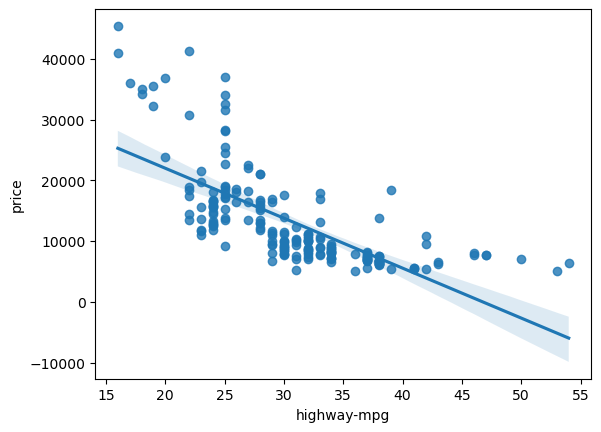

In [ ]:
#Is highway a potential predictor of price?
sns.regplot(x="highway-mpg",y="price",data=df)

In [ ]:
#Developing the mathematical model for the relationship between 'highway-mpg' and 'price'

#Define the independent variable x ('highway-mpg')
x=df['highway-mpg']

#Add a constant term to the expression
x=sm.add_constant(x)

#Define the dependent variable y ('price)
y=df['price']

#Fit the linear regression model
model=sm.OLS(y,x).fit()

#Get the coefficients of the model
m=model.params['highway-mpg']
b=model.params['const']

#Round 'm' and 'b' to the second decimal place
m=round(m,2)
b=round(b,2)

print(f'y={m}x+{b}')


y=-821.73x+38423.31


In [ ]:
#What is the Pearson correlation coefficient between 'highway-mpg' and 'price'?
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


The downward tilted regression line the the coefficient of -0.70 indicates an inverse/negative relationship between the 'highway-mpg' and 'price'. 

### Weak relationship

<Axes: xlabel='peak-rpm', ylabel='price'>

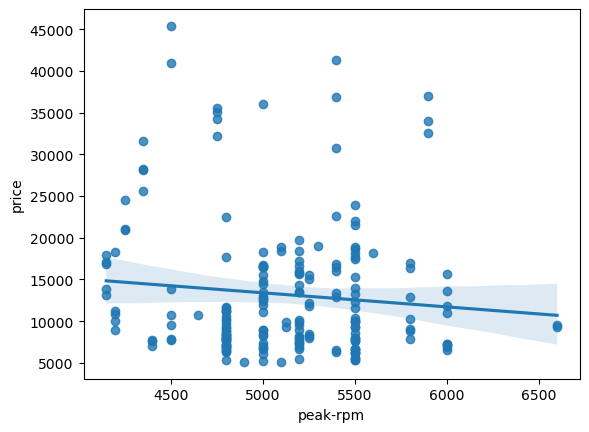

In [ ]:
#Is 'peak-rpm' a predictor of 'price'?
sns.regplot(x="peak-rpm",y="price",data=df)

In [ ]:
x=df['peak-rpm']

#Add a constant term to the expression
x=sm.add_constant(x)

#Define the dependent variable y ('price)
y=df['price']

#Fit the linear regression model
model=sm.OLS(y,x).fit()

#Get the coefficients of the model
m=model.params['peak-rpm']
b=model.params['const']

#Round 'm' and 'b' to the second decimal place
m=round(m,2)
b=round(b,2)

print(f'y={m}x+{b}')

y=-1.69x+21851.01


In [ ]:
#What is the correlation between 'peak-rpm' and 'price'?
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


It does not seem that 'peak-rpm' is a predictor variable of price because the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Additionally, the correlation coefficient is a merely -0.11. Therefore, we can only assert a weak negative/inverse relationship. 

<Axes: xlabel='stroke', ylabel='price'>

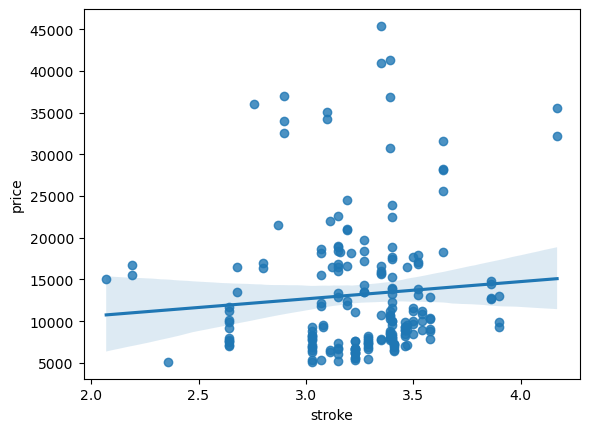

In [ ]:
#Linear regression plotting of the 'stroke' and 'price' variables:
sns.regplot(x="stroke",y="price",data=df)

In [ ]:
#What is the correlation coefficeint between 'stroke' and 'price'?
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


The positive correlation between 'stroke' and 'price' is weak since the regression line is horizontal with too much variability in the distribution of the data points. On top of this, the Pearson corelation coefficient is  of 0.08, which is close to zero. 

## ANOVA Hypothesis Testing <a id="2"></a>
### Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type 'object' or 'int64'. A good way to visualize categorical varaibles is by using boxplots. 

<Axes: xlabel='body-style', ylabel='price'>

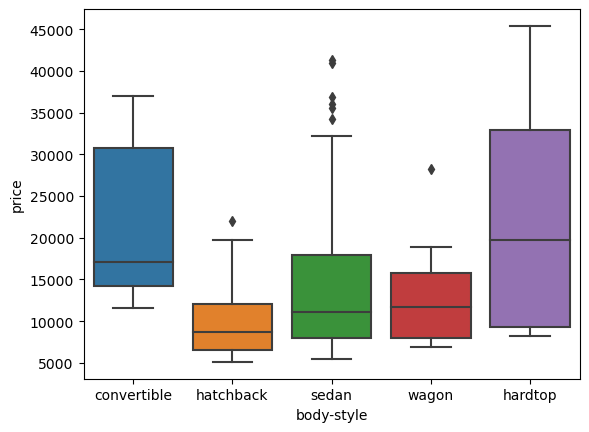

In [ ]:
#Visualize the relationship between 'body-style' and 'price'
sns.boxplot(x="body-style",y="price",data=df)

In [ ]:
import scipy.stats as stats
grouped_data = df.groupby("body-style")["price"]
f_stat, p_value = stats.f_oneway(*[group.values for name, group in grouped_data])
print("ANOVA results: F=", f_stat, ", P =", p_value)


ANOVA results: F= 9.12875185470821 , P = 8.779795237614595e-07


ANOVA test requirements:

1) Independent: the observations or data points should be independent of each other. This means that the measurement  or samples should not be influenced by each other and should be collected or assigned randomly.
2) Normality: the data within each group or category should follow a normal distribution. 
3) Homogeneity of variance (homoscedasticity): the variability or spread of data within each group or category should be roughly equal. It ensures that the groups have similar levels of dispersion and that the assumption of equal variance across groups is met. 
4) Independence of Errors: The errors or residuals should be independent of each other and not exhibit any systematic patterns. Independence of errors is crucial to ensure that the statistical tests are not biased or distorted. 

If we set the significance level (alpha) to 5% (0.05)

* If the p-value is less than the significance level (p-value<alpha), we reject the null hypothesis.

* If the p-value is greater than the significance level (p-value>=alpha), then we fail to reject the null hypothesis. This means that there is not enough evidence to support the alternative hypothesis, and we do not have strong evidence against the null hypotheis. 

In our case, P-value=8.78...
P-value>alpha
Therefore, we fail to reject the null hypothesis. So we must assume that variation is due to chance. 

By just observing the boxplot, we see that the distribution of prices between different body-styles have a significant overlap, so body-style would not be a good predictor of price changes.

The ANOVA test allows a comparison of more than two groups at the same time to determine whether a relationship exists between them. The result of the ANOVA formula, the F statistic (also called the F-ratio), allows for the analysis of multiple groups of data to determine the variability between samples and within samples.

If no real difference exists between the tested groups, which is called the null hypothesis, the result of the ANOVA's F-ratio statistic will be close to 1. The distribution of all possible values of the F statistic is the F-distribution. 



<Axes: xlabel='engine-location', ylabel='price'>

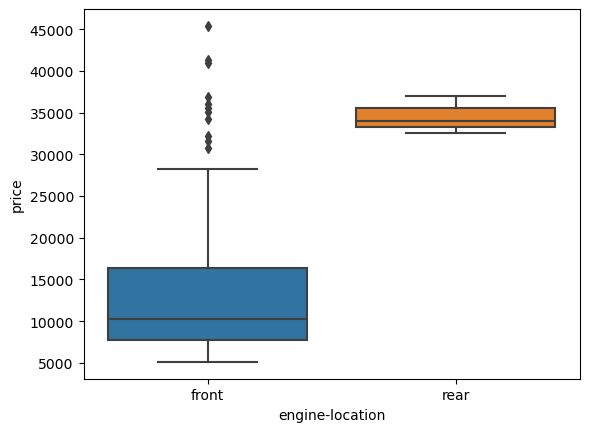

In [ ]:
#Assessing the relationship between "engine-location" and "price":
sns.boxplot(x="engine-location",y="price",data=df)

In [ ]:
grouped_data_1=df.groupby("engine-location")["price"]
f_stat_1, p_value_1=stats.f_oneway(*[group.values for name, group in grouped_data_1])
print("ANOVA results: F-statistic=",f_stat_1,", P-Value=",p_value_1)

ANOVA results: F-statistic= 24.495550318865693 , P-Value= 1.583490019777699e-06


Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price. 

<Axes: xlabel='drive-wheels', ylabel='price'>

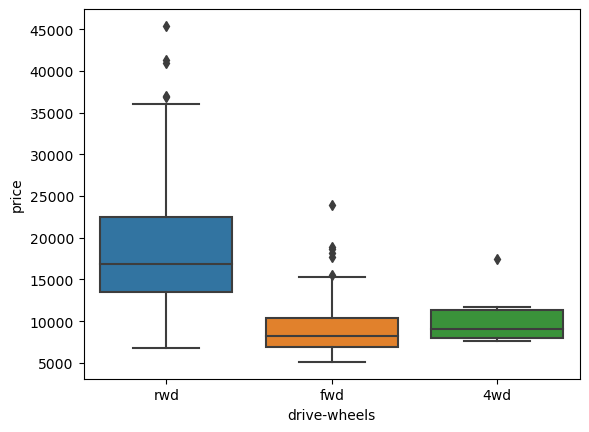

In [ ]:
#Examining the relationship between "drive-wheels" and "price":
sns.boxplot(x="drive-wheels",y="price",data=df)

In [ ]:
#Assessing the relationship between "drive-wheels" and "price" using the ANOVA method:
grouped_data_2= df.groupby("drive-wheels")["price"]
f_stat_2, p_value_2=stats.f_oneway(*[group.values for name, group in grouped_data_2]) #The * operator unpacks the argument list
print("ANOVA results: F-statistic=",f_stat_2,", P-Value=",p_value_2)

ANOVA results: F-statistic= 67.95406500780399 , P-Value= 3.3945443577151245e-23


The distribution of price between the differnt drive-wheels categories differ. As such, drive-wheels could potentially be a predictor of price. 

And indeed, the F-statistic of 67.95 indicates that the variance between the group mean is significantly larger thant ehv ariance within the groups. This suggest that the means of the group are not the same. This is the a strong evidence against the null hypothesis (i.e. drive-wheels property has no effect over prices). 

With a p-value=3.39..%, which we can reject the null hypothesis all together and consider the alternative hypothesis that drive-wheel propeties in the car indeed have an effect on the pricing of the vehicle. This more evidently seen by the increase in prices of the rear-wheel drive category of our data, which increase the price of the vehicle significantly above the front wheel and all 4-wheel drive properties. 

## Descriptive Statistical Analysis <a id="3"></a>

The describe function automatically computes the basic statistics for all continious variables. Any NaN values are automatically skipped in these statistics.

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [ ]:
#Because the describe() skips variables/columns of the type object, we add "object" to see the specs of the object type variables:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


## Value Counts <a id="4"></a>

Value counts are a good way of understanding how many units of each characteristic/varaible we have. 

In [ ]:
#Applying the "value_counts" method on the variable "drive-wheels" to see how many units of each characteristic/variable we have:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [ ]:
#Converting the series into a dataframe:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [ ]:
#Let's save the results to a dataframe named "drive_wheels_counts" and rename the column "driven-wheels" to "value_counts":
drive_wheels_counts=df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [ ]:
#Renaming the index 'driven-wheels'
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
#Repeating the same process for the variable 'engine-location':
engine_loc_counts=df['engine-location'].value_counts().to_frame() #Naming the dataframe 'engine_loc_counts'
engine_loc_counts.rename(columns={'engine-location':'value_counts'},inplace=True) #Renaming the column 'engine-location' to 'value_counts'
engine_loc_counts.index.name='engine-location' #Naming the index 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


Note that engine location would not be a good predictor of price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed (meaning that it's not distributed normally).

## Statistics by Grouping <a id="5"></a>

The 'groupby' method groups data by different categories. THe data is grouped based on one or serveral varaibles, and analysis is performed on the individual groups. 



In [ ]:
#Group by the variable "drive-wheels"
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
df_group_one=df[['drive-wheels','body-style','price']]

#Which drive wheel is most valuable?

#Calculate the average price for each of the different categories of data
df_group_one=df_group_one.groupby(['drive-wheels'],as_index=False).mean() #Grouping the data by the variable 'drive-wheels' and calculating the mean of the other variables
df_group_one

C:\Users\16193\AppData\Local\Temp\ipykernel_30280\2011520149.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one=df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [ ]:
#Grouping multiple variables, 'drive-wheels' and 'body-style', and then storing the results in the variable 'grouped_test1':
df_gptest=df[['drive-wheels','body-style','price']]
group_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean() #Grouping results by 'drive-wheels' and 'body-style' and storing the results in the variable 'group_test1'
group_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [ ]:
#Converting the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.
grouped_pivot=group_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [ ]:
#Filling missing values in the pivot table with 0:
grouped_pivot=grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [ ]:
#Use the "groupby" function to find the average "price" of each car based on "body-style"
df_gptest2=df[['body-style','price']]
grouped_test_bodystyle=df_gptest2.groupby(['body-style'],as_index=False).mean() #Grouping the data by 'body-style' and calculating the price by 'body-style'"Data Acquisition.ipynb"
grouped_test_bodystyle


,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

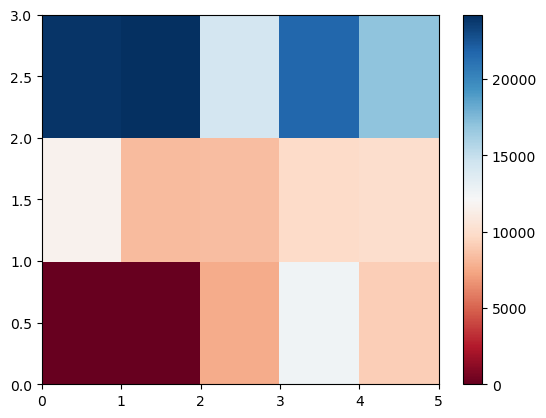

In [ ]:
#Let's use a heat map to vizualize the relationship between body-style & drive-wheel and price:
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

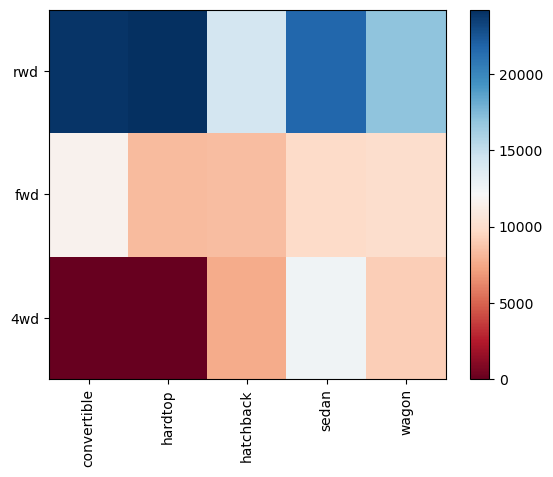

In [ ]:
#Adding useful labels to the heat map:
fig,ax=plt.subplots() #Use to create a figure and set of subplots. 'ax' is the variable repreenting the subplot or axis object. 'plt.subplots()' is the function used to create a figure and one or more subplots.
im=ax.pcolor(grouped_pivot,cmap='RdBu') #pcolor() is the function used to create a pseudocolor plot or heatmap. 'cmpa='RdBu' is the colormap used.

#label names
row_labels=grouped_pivot.columns.levels[1] #Extracting the row labels from the grouped_pivot dataframe
col_labels=grouped_pivot.index #Extracting the column labels from the grouped_pivot dataframe

#Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5,minor=False) #'set_xticks' is used to set the x-axis tick position. 
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5,minor=False) #'set_yticks' is used to set the y-axis tick position.

#Inserting labels:
ax.set_xticklabels(row_labels,minor=False) #'set_xticklabels' is used to set the x-axis tick labels. 'minor=False' is used to set the x-axis tick labels to the right.
ax.set_yticklabels(col_labels,minor=False) #'set_yticklabels' is used to set the y-axis tick labels. 'minor=False' is used to set the y-axis tick labels to the right.

#rotate label if too long
plt.xticks(rotation=90) #'plt.xticks' is used to rotate the x-axis tick labels by 90 degrees.

fig.colorbar(im) #Adding a colorbar to the heatmap
plt.show() #Displaying the heatmap

## Pearson Correlation Coefficeint and P-Value <a id="6"></a>
### Correlation and Causation

Correlation: a measure of the extend of interdependence between variables.

Causation: the relationship between cause and effect between two variables. 

Pearson Correlation: measures the linear dependence between two variables x and y.
The resulting coefficient is a value between -1 and 1, where:

* 1: Perfect positive linear correlation
* 0: No linear correlation, the two variables most likely do not effect each other. 
* -1: Perfect negative linear correlation. 

We have used 'corr' function on int64 and float64 datatypes. 



In [ ]:
df.corr()

C:\Users\16193\AppData\Local\Temp\ipykernel_30280\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


The P-value is the probability value that the correaltion between these two variables is statistically significant. Normally, we choose a significance level of 0.05 (5%), which means that we are 95% confident that the correlation between the variables is significant. 

By convention, when the

* p-value < 0.001: we say there is strong evidence that the correlation is significant.

* p-value < 0.05: there is moderate evidence that the correlation is significant.

* p-value < 0.1: there is weak evidence that the correlation is significant.

* p-value > 0.1: there is no evidence that the correlation is significant.


In [ ]:

from scipy import stats

In [ ]:
#Calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price':
pearson_coef,p_value=stats.pearsonr(df['wheel-base'],df['price'])
print("the Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P=", p_value)


the Pearson Correlation Coefficient is 0.584641822265508 with a P-value of P= 8.076488270732885e-20


Since the p-value is  <0.001, the correlation between length and price is statistically significant. The linear regression is not strong either (P=0.584...)

In [ ]:
#Calculate the Pearson Correlation Coefficient and P-value of 'horse-power' and 'price':
pearson_coef,p_value=stats.pearsonr(df['horsepower'],df['price'])
print("the Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P=", p_value)


the Pearson Correlation Coefficient is 0.809574567003656 with a P-value of P= 6.369057428259557e-48



Since the p-value is  <0.001, the correlation between length and price is statistically significant.
Pearson Correlation Coefficient=0.8095...Here we have a Pearson Correlation that is somewhat strong. 

In [ ]:
#Calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price':
pearson_coef,p_value=stats.pearsonr(df['length'],df['price'])
print('The Pearson Correlation Coefficient is:', pearson_coef, 'with a P-value of P=', p_value)


The Pearson Correlation Coefficient is: 0.690628380448364 with a P-value of P= 8.016477466158868e-30


Since the p-value is  <0.001, the correlation between length and price is statistically significant.

Correlation coefficient=0.69....which means that the correlation is moderately significant. 

In [ ]:
#Calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':
pearson_coef,p_value=stats.pearsonr(df['width'],df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coef, "with a P-value of P=", p_value)


The Pearson Correlation Coefficient is: 0.7512653440522674 with a P-value of P= 9.20033551048144e-38


Since the p-value<0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong since the correlation coefficient=0.751....

In [ ]:
#Calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':
pearson_coef,p_value=stats.pearsonr(df['curb-weight'],df['price'])
print("the Pearson Correlation Coefficient is",pearson_coef,"with a P-value of P=",p_value)

the Pearson Correlation Coefficient is 0.8344145257702845 with a P-value of P= 2.189577238893965e-53


Since the P-value<0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong since the correlation coefficient is 0.834...


In [ ]:
#Calculate the Pearson Correlation Coefficient and the P-value of the 'engine-size' and 'price':
pearson_coef,p_value=stats.pearsonr(df['engine-size'],df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coef, "with a P-value of P=", p_value)

The Pearson Correlation Coefficient is: 0.8723351674455186 with a P-value of P= 9.265491622197359e-64


Sicen the p-value<0.0001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (Pearson CC=0.872...)

In [ ]:
#Calculate the Pearson Correlation Coefficient and the P-value of 'bore' and 'price':
pearson_coef,p_value=stats.pearsonr(df['bore'],df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coef, "with a P-value of P=", p_value)


The Pearson Correlation Coefficient is: 0.5431553832626602 with a P-value of P= 8.049189483935315e-17


Since the p-value<0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (Pearson CC=0.543...)

In [ ]:
#Calculate the Pearson Correlation Coefficient and the P-value of 'city-mpg' and 'price':
pearson_coef,p_value = stats.pearsonr(df['city-mpg'],df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coef, "with a P-value of P=", p_value)


The Pearson Correlation Coefficient is: -0.6865710067844677 with a P-value of P= 2.3211320655676474e-29


Since the p-value<0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is moderately negative. 

In [ ]:
#Calculate the Pearson Correlation Coefficient and the P-value of 'highway-mpg' and 'price':
pearson_coef,p_value = stats.pearsonr(df['highway-mpg'],df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coef, "with a P-value of P=", p_value)

The Pearson Correlation Coefficient is: -0.704692265058953 with a P-value of P= 1.749547114447557e-31


Since the p-value is <0.001, the correlation between highway-mpg and price is statistically significatn. The coefficient is about -0.705, which shows that the relationship btw the two variables is negative and moderately strong. 

## ANOVA and the Pearson Coefficient Analysis <a id="7"></a>

Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant difference between the means of two or more groups. ANOVA returns two parameters: 

* F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

* P-value: P-value tells how statistically significant our calculated score value is. 

If our price variable is strongly correlated with the varaible we are analyzing, we expect ANOVA to return a sizeable F-test score and a small P-value. 

Since ANOVA analyzes the differences between different groups of teh same variable, the groupby function will come in handy.Becuase the ANOVA algorithm average the data automatically, we do not need to take average before hand.

In [ ]:
#Group the data to see if different types of 'drive-wheels' impact 'price':
grouped_test2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [ ]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [ ]:
#We obtain the values of the method group using the method "get_group()"
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [ ]:
#We can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
print("ANOVA results: F=",f_val,", P=",p_val)


ANOVA results: F= 67.95406500780399 , P= 3.3945443577151245e-23


F-statistic score of 67.95... shows a strong correlation and the P-value is almost of 0, implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated. 

In [ ]:
#Comparing the means of the prices of fwd and rwd cars:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('fwd')['price'],grouped_test2.get_group('rwd')['price'])
#f_val stores teh F-statistic value calculated by 'f_oneway()'
#'p_val' stores the p-value calculated by 'f_oneway()' function. 
#stats.f_oneaway() function of scipy.stats library performs a one-way ANOVA test. It takes multiple arrays or groups as arguments and calculates the F-statistic and associated p-value. 
#'grouped_test2.get_group('fwd')['price']' retrives the price values of the 'fwd' drive-wheels group.

            
print("ANOVA results: F=",f_val,",P=",p_val)

ANOVA results: F= 130.5533160959111 ,P= 2.2355306355677845e-23


In [49]:
#Comparing the means of the prices of 4wd and rwd cars:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('4wd')['price'],grouped_test2.get_group('rwd')['price'])
print("ANOVA results: F=",f_val,", P=",p_val)

NameError: name 'grouped_test2' is not defined

In [ ]:
#Comparing the means of the prices of 4wd and fwd cars:

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


#### Conclusion
For predicting price for cars, we have narrowed down the variables that have a correlation:

Continuous numerical variables:

*Length

*Width

*Curb-weight

*Engine-size

*Horsepower

*City-mpg

*Highway-mpg

*Wheel-base

*Bore

Categorical variables:

*Drive-wheels
